Clean Test Features rows: 1476
Clean Test Labels rows: 1476
Test Accuracy: 0.8848
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       667
           1       0.93      0.86      0.89       809

    accuracy                           0.88      1476
   macro avg       0.88      0.89      0.88      1476
weighted avg       0.89      0.88      0.89      1476

ROC-AUC on test set: 0.9314


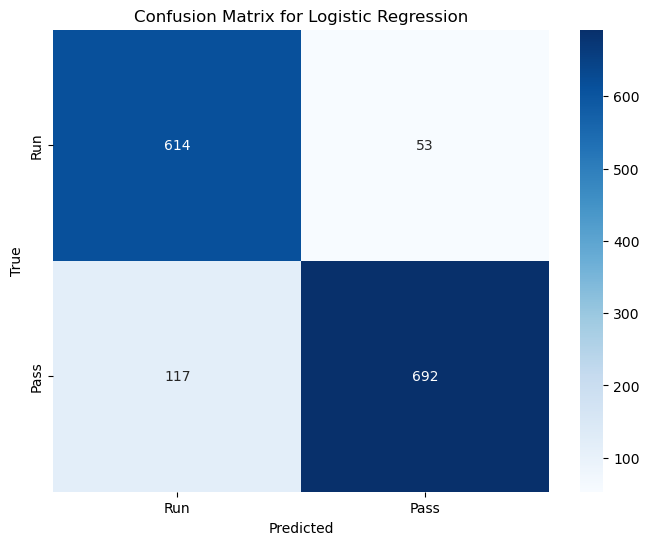

Test predictions saved to '../data/results/test_predictions.csv'


,predicted_class,true_label,predicted_proba
0,1,1,0.908016
1,0,1,0.188856
2,1,1,0.963534
3,1,1,0.974639
4,1,1,0.692904


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from IPython.display import display

# Load the trained model and scaler
logreg_model = joblib.load('RUNvsPASS_logreg.pkl')  # Updated model name for clarity
scaler = joblib.load('scaler.pkl')                 # Load the saved scaler

# Load the test data (week 9)
test_features = pd.read_csv('../data/processed_data/testing_data.csv')

# Load the training data to ensure feature consistency
train_features = pd.read_csv('../data/processed_data/training_features.csv')

# Align test set features with training set columns
test_features = test_features[train_features.columns]  # Align columns between train and test set

# Scale the test features using the loaded scaler
X_test_scaled = scaler.transform(test_features)  # Only transform, do not fit

# Load the true target labels (play_type) for the test data
y_test = pd.read_csv('../data/processed_data/test_labels.csv')  # Load test labels

# Drop rows with NaN values in both the features and the target labels
test_features_clean = test_features.dropna()
y_test_clean = y_test.loc[test_features_clean.index]  # Ensure indices match after dropping NaNs

# Display shapes of cleaned datasets
print(f"Clean Test Features rows: {test_features_clean.shape[0]}")
print(f"Clean Test Labels rows: {y_test_clean.shape[0]}")

# Make predictions on the scaled test data
y_test_pred = logreg_model.predict(X_test_scaled)
y_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the model on the test data
accuracy = accuracy_score(y_test_clean, y_test_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test_clean, y_test_pred))

# ROC-AUC Score for the test set
roc_auc_final = roc_auc_score(y_test_clean, y_prob)
print(f"ROC-AUC on test set: {roc_auc_final:.4f}")

# Confusion Matrix for the test set
cm_final = confusion_matrix(y_test_clean, y_test_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", xticklabels=['Run', 'Pass'], yticklabels=['Run', 'Pass'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot to a file (e.g., PNG)
plt.savefig('test_data_confusion_matrix_logreg.png', bbox_inches='tight')
plt.show()

# Save predictions and probabilities for analysis
test_features_clean['predicted_class'] = y_test_pred
test_features_clean['predicted_proba'] = y_prob
test_features_clean['true_label'] = y_test_clean.values

# Export the results for analysis
test_features_clean.to_csv('../data/results/test_predictions.csv', index=False)
print("Test predictions saved to '../data/results/test_predictions.csv'")
display(test_features_clean[['predicted_class', 'true_label', 'predicted_proba']].head())